# (4주차) 9월27일 -- draft
> 딥러닝의 기초 - 회귀분석(3)-- step 4의 다른표현 (옵티마이저)

- toc:true
- branch: master
- badges: true
- comments: true
- author: 최규빈

## Imports

In [36]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

## step1의 다른버전 (복습 + $\alpha$)

In [37]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-09-22-regression.csv") 
df.head(1)

,x,y
0,-2.482113,-8.542024


`-` 분석을 위해 df -> tensor로 변환

In [38]:
x= torch.tensor(df.x,dtype=torch.float32).reshape(100,1)
y= torch.tensor(df.y,dtype=torch.float32).reshape(100,1)
X= torch.tensor([[1]*100,x]).T

### ver1: net = torch.nn.Linear(1,1,bias=True) 

`-` step1: yhat

In [39]:
net = torch.nn.Linear(in_features=1,out_features=1)
# net = torch.nn.Linear(1,1) 동일
net.weight.data, net.bias.data

(tensor([[0.0488]]), tensor([0.2542]))

In [40]:
net.weight.data = torch.tensor([[10.0]])
net.bias.data = torch.tensor([-5.0])                         
net.weight.data, net.bias.data

(tensor([[10.]]), tensor([-5.]))

In [41]:
# yhat 생성
yhat = net(x)

`-` step2: loss 

In [42]:
loss = torch.mean((y-yhat)**2)
loss 
# 아니면
loss_fn = torch.nn.MSELoss()
loss = loss_fn(y,yhat); loss

tensor(85.8769, grad_fn=<MseLossBackward0>)

`-` step3: 미분 

(미분전상황)

In [43]:
net.weight, net.bias

(Parameter containing:
 tensor([[10.]], requires_grad=True),
 Parameter containing:
 tensor([-5.], requires_grad=True))

In [44]:
net.weight.grad, net.bias.grad
# 아직 미분안 했으니 미분계수 값이 저장되어 있지 않음

(None, None)

(미분)

In [23]:
loss.backward()  
# 미분과정의 다른 ver은 없다

(미분후상황)

In [24]:
net.weight, net.bias

(Parameter containing:
 tensor([[10.]], requires_grad=True),
 Parameter containing:
 tensor([-5.], requires_grad=True))

In [25]:
net.weight.grad, net.bias.grad

(tensor([[11.8893]]), tensor([-13.4225]))

`-` step4: update 

In [26]:
net.weight.data = net.weight.data - 1/10 * net.weight.grad 
net.bias.data = net.bias.data - 1/10 * net.bias.grad

In [27]:
net.weight.data,net.bias.data

(tensor([[8.8111]]), tensor([-3.6577]))

`-` 반복 

(code before)

In [45]:
What = torch.tensor([[-5.0],[10.0]],requires_grad=True) 
# requires_grad = True는 net 생성해서 yhat만들 땐 안 해줘도 됨

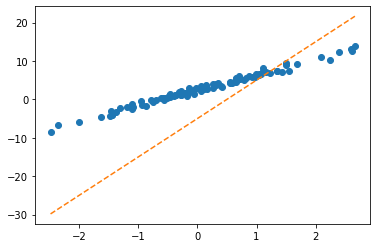

In [46]:
plt.plot(x,y,'o')
plt.plot(x,(X@What).data,'--')

In [51]:
for epoc in range(30):
    ## step1 
    yhat = X@What     
    ## step2
    loss = torch.mean((y-yhat)**2) 
    ## step3 
    loss.backward()
    ## step4 
    What.data = What.data - 1/10 * What.grad # SSE가 아니라 MSE를 구했기 때문에 학습률을 1/10으로 설정.
    What.grad = None # 미분값이 누적되지 않고, 계속 초기화시켜주는 것

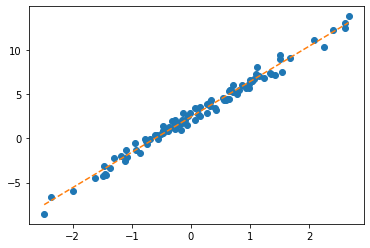

In [52]:
plt.plot(x,y,'o')
plt.plot(x,(X@What).data,'--')

(code after) 

In [53]:
net = torch.nn.Linear(in_features=1,out_features=1)
net.weight.data = torch.tensor([[10.0]])
net.bias.data = torch.tensor([-5.0]) 

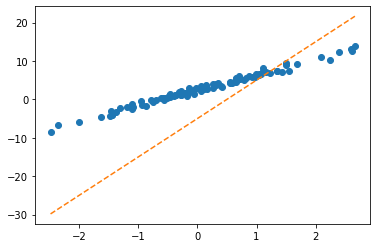

In [54]:
plt.plot(x,y,'o')
plt.plot(x,net(x).data,'--')

In [55]:
for epoc in range(30):
    ## step1 
    yhat = net(x)
    ## step2
    loss = torch.mean((y-yhat)**2) 
    ## step3 
    loss.backward()
    ## step4 (이게 엄청 귀찮아지네??) 
    net.weight.data = net.weight.data - 1/10 * net.weight.grad 
    net.bias.data = net.bias.data - 1/10 * net.bias.grad
    net.weight.grad = None 
    net.bias.grad = None 
    
    # net 생성해서 yhat 만들 때 말고 그냥 What 사용했을 떈, requires_grad = True도 해줘야되고,
    # 청소는 What.grad = None 한 번만 해주면 된다. 

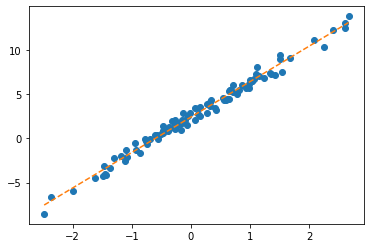

In [56]:
plt.plot(x,y,'o')
plt.plot(x,net(x).data,'--')

### ver2: net = torch.nn.Linear(2,1,bias=False) 

`-` step1: yhat

In [57]:
net = torch.nn.Linear(in_features=2,out_features=1,bias=False) 

In [58]:
net.weight
# 각각 w0,w1을 의미함

Parameter containing:
tensor([[0.4089, 0.5575]], requires_grad=True)

In [59]:
net.weight.data = torch.tensor([[-5.0, 10.0]])
net.weight

Parameter containing:
tensor([[-5., 10.]], requires_grad=True)

In [60]:
yhat=net(X)

`-` step2: loss

In [61]:
loss = torch.mean((y-yhat)**2)
loss

tensor(85.8769, grad_fn=<MeanBackward0>)

`-` step3: 미분 

(미분전상황) 

In [62]:
net.weight.data

tensor([[-5., 10.]])

In [63]:
net.weight.grad

(미분) 

In [64]:
loss.backward()

(미분후상황) 

In [65]:
net.weight.data

tensor([[-5., 10.]])

In [66]:
net.weight.grad

tensor([[-13.4225,  11.8893]])

`-` step4: update 

In [67]:
net.weight.data = net.weight.data - 1/10 * net.weight.grad 
net.weight.data

tensor([[-3.6577,  8.8111]])

`-` 반복 

(code before) -- ver1과 같으므로 생략할게요

(code after)

In [68]:
net = torch.nn.Linear(in_features=2,out_features=1,bias=False)
net.weight.data = torch.tensor([[-5.0, 10.0]]) 

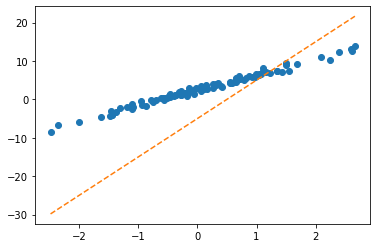

In [69]:
plt.plot(x,y,'o')
plt.plot(x,net(X).data,'--')

In [72]:
for epoc in range(30): 
    ## step1 
    yhat = net(X) 
    ## step2 
    loss = torch.mean((y-yhat)**2)
    ## step3 
    loss.backward() 
    ## step4 
    net.weight.data = net.weight.data - 1/10 * net.weight.grad
    net.weight.grad = None

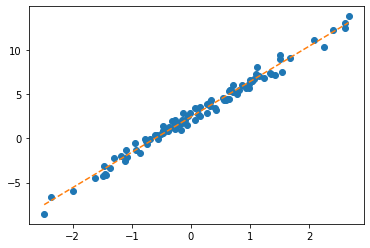

In [73]:
plt.plot(x,y,'o')
plt.plot(x,net(X).data,'--') 

## step4의 다른버전: 옵티마이저!

### ver1: net = torch.nn.Linear(1,1,bias=True) 

`-` 준비 

In [74]:
net = torch.nn.Linear(1,1) 
net.weight.data = torch.tensor([[10.0]]) 
net.bias.data = torch.tensor([[-5.0]]) 

In [75]:
optimizr = torch.optim.SGD(net.parameters(),lr=1/10) 

`-` step1~3

In [76]:
yhat = net(x)     

In [77]:
loss = torch.mean((y-yhat)**2) 

In [78]:
loss.backward() 

`-` step4 

(update 전)

In [79]:
net.weight.data, net.bias.data ## 값은 업데이트 전

(tensor([[10.]]), tensor([[-5.]]))

In [80]:
net.weight.grad, net.bias.grad ## 미분값은 청소전 

(tensor([[11.8893]]), tensor([[-13.4225]]))

(update) 

In [81]:
optimizr.step() 
optimizr.zero_grad() 

(update 후) 

In [82]:
net.weight.data, net.bias.data ## 값은 업데이트 되었음 

(tensor([[8.8111]]), tensor([[-3.6577]]))

In [83]:
net.weight.grad, net.bias.grad ## 미분값은 0으로 초기화하였음 

(tensor([[0.]]), tensor([[0.]]))

`-` 반복 

In [84]:
net = torch.nn.Linear(1,1) 
net.weight.data = torch.tensor([[10.0]])
net.bias.data = torch.tensor([-5.0])
optimizr = torch.optim.SGD(net.parameters(),lr=1/10) 

In [85]:
for epoc in range(30): 
    yhat = net(x)
    loss = torch.mean((y-yhat)**2) 
    loss.backward() 
    optimizr.step(); optimizr.zero_grad() 

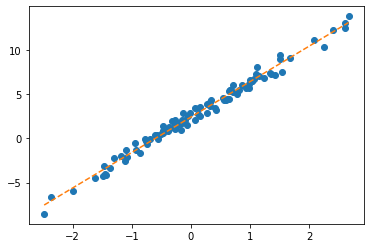

In [86]:
plt.plot(x,y,'o')
plt.plot(x,net(x).data,'--')

### ver2: net = torch.nn.Linear(2,1,bias=False) 

In [87]:
net = torch.nn.Linear(2,1,bias=False) 
net.weight.data = torch.tensor([[-5.0, 10.0]])
optimizr = torch.optim.SGD(net.parameters(),lr=1/10) 

In [88]:
for epoc in range(30): 
    yhat = net(X)
    loss = torch.mean((y-yhat)**2) 
    loss.backward() 
    optimizr.step(); optimizr.zero_grad() 

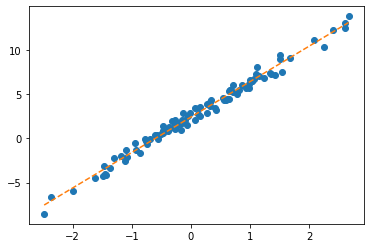

In [89]:
plt.plot(x,y,'o')
plt.plot(x,net(X).data,'--')

--- 

## Appendix: `net.parameters()`의 의미? (선택학습)

`-` iterator, generator의 개념필요 
- https://guebin.github.io/IP2022/2022/06/06/(14주차)-6월6일.html, 클래스공부 8단계 참고 


`-` 탐구시작: 네트워크 생성 

In [93]:
net = torch.nn.Linear(in_features=1,out_features=1)
net.weight

Parameter containing:
tensor([[-0.2120]], requires_grad=True)

In [94]:
net.bias

Parameter containing:
tensor([0.8670], requires_grad=True)

`-` torch.optim.SGD? 를 확인하면 params에 대한설명에 아래와 같이 되어있음 

```
params (iterable): iterable of parameters to optimize or dicts defining
        parameter groups
```

`-` 설명을 읽어보면 params에 iterable object를 넣으라고 되어있음 (iterable object는 숨겨진 명령어로 `__iter__`를 가지고 있는 오브젝트를 의미)

In [95]:
set(dir(net.parameters)) & {'__iter__'}

set()

In [96]:
set(dir(net.parameters())) & {'__iter__'}

{'__iter__'}

`-` 무슨의미? 

In [97]:
_generator = net.parameters()

In [98]:
_generator.__next__()

Parameter containing:
tensor([[-0.2120]], requires_grad=True)

In [99]:
_generator.__next__()

Parameter containing:
tensor([0.8670], requires_grad=True)

In [100]:
_generator.__next__()

StopIteration: 

`-` 이건 이런느낌인데? 

In [101]:
_generator2 = iter([net.weight,net.bias])

In [102]:
_generator2

In [103]:
_generator2.__next__()

Parameter containing:
tensor([[-0.2120]], requires_grad=True)

In [104]:
_generator2.__next__()

Parameter containing:
tensor([0.8670], requires_grad=True)

In [105]:
_generator2.__next__()

StopIteration: 

`-` 즉 아래는 같은코드이다. 

```python
### 코드1
_generator = net.parameters() 
torch.optim.SGD(_generator,lr=1/10) 
### 코드2
_generator = iter([net.weight,net.bias])
torch.optim.SGD(_generator,lr=1/10) 
### 코드3 (이렇게 써도 코드2가 실행된다고 이해할 수 있음)
_iterator = [net.weight,net.bias]
torch.optim.SGD(_iterator,lr=1/10) 
```

결론: `net.parameters()`는 net오브젝트에서 학습할 파라메터를 모두 모아 리스트(iterable object)로 만드는 함수라 이해할 수 있다. 

`-` 응용예제1

In [106]:
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
optimizr = torch.optim.SGD([What],lr=1/10) 

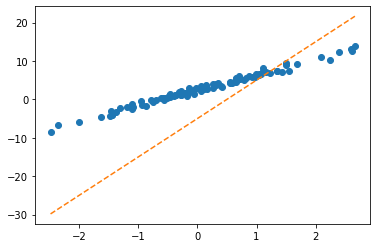

In [107]:
plt.plot(x,y,'o')
plt.plot(x,(X@What).data,'--')

In [108]:
for epoc in range(30):
    yhat = X@What 
    loss = torch.mean((y-yhat)**2)
    loss.backward()
    optimizr.step();optimizr.zero_grad() 

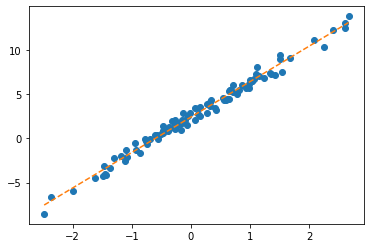

In [109]:
plt.plot(x,y,'o')
plt.plot(x,(X@What).data,'--')

`-` 응용예제2

In [110]:
b = torch.tensor(-5.0,requires_grad=True)
w = torch.tensor(10.0,requires_grad=True)
optimizr = torch.optim.SGD([b,w],lr=1/10)

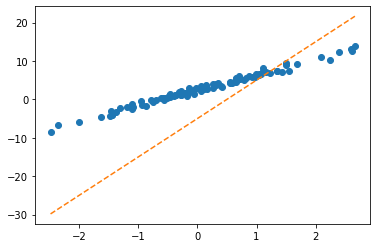

In [111]:
plt.plot(x,y,'o')
plt.plot(x,(w*x+b).data,'--')

In [112]:
for epoc in range(30):
    yhat = b+ w*x 
    loss = torch.mean((y-yhat)**2)
    loss.backward()
    optimizr.step(); optimizr.zero_grad()

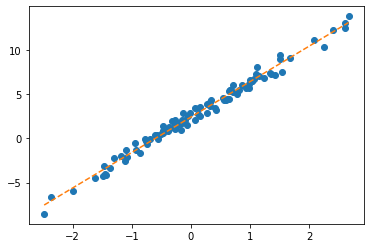

In [113]:
plt.plot(x,y,'o')
plt.plot(x,(w*x+b).data,'--')

---

---

---

## Logistic regression 

- ### motive 

`-` 현실에서 이런 경우가 많음 
- $x$가 커질수록 (혹은 작아질수록) 성공확률이 증가함. 
  - 예를 들면, 학점이나 토익 점수가 높아질수록 성공확률이 증가하는 것과 유사한 얘기

`-` (X,y)는 어떤모양? 

In [94]:
_df = pd.DataFrame({'x':range(-6,7),'y':[0,0,0,0,0,0,1,0,1,1,1,1,1]})
_df 

,x,y
0,-6,0
1,-5,0
2,-4,0
3,-3,0
4,-2,0
5,-1,0
6,0,1
7,1,0
8,2,1
9,3,1


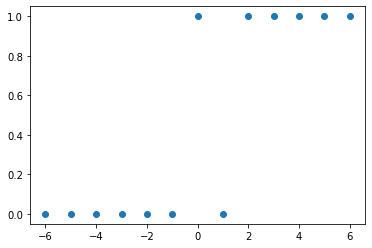

In [95]:
plt.plot(_df.x,_df.y,'o')

`-` (예비학습) 시그모이드라는 함수가 있음 

In [96]:
xx = torch.linspace(-6,6,100)
def f(x):
    return torch.exp(x)/(1+torch.exp(x))

f = lambda x : torch.exp(x)/(1+torch.exp(x))

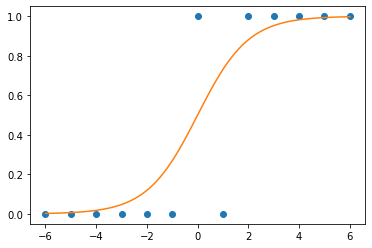

In [97]:
plt.plot(_df.x,_df.y,'o')
plt.plot(xx,f(xx))
# 만약 f라는 함수에 xx가 아니라 2,3,4,,,등을 곱하면 xx의 영향력이 커진다..
# 즉, outlier 개수가 줄어든다?,,

In [99]:
10*xx

tensor([-60.0000, -58.7879, -57.5758, -56.3636, -55.1515, -53.9394, -52.7273,
        -51.5152, -50.3030, -49.0909, -47.8788, -46.6667, -45.4545, -44.2424,
        -43.0303, -41.8182, -40.6061, -39.3939, -38.1818, -36.9697, -35.7576,
        -34.5455, -33.3333, -32.1212, -30.9091, -29.6970, -28.4848, -27.2727,
        -26.0606, -24.8485, -23.6364, -22.4242, -21.2121, -20.0000, -18.7879,
        -17.5758, -16.3636, -15.1515, -13.9394, -12.7273, -11.5152, -10.3030,
         -9.0909,  -7.8788,  -6.6667,  -5.4545,  -4.2424,  -3.0303,  -1.8182,
         -0.6061,   0.6061,   1.8182,   3.0303,   4.2424,   5.4545,   6.6667,
          7.8788,   9.0909,  10.3030,  11.5151,  12.7273,  13.9394,  15.1515,
         16.3636,  17.5758,  18.7879,  20.0000,  21.2121,  22.4242,  23.6364,
         24.8485,  26.0606,  27.2727,  28.4848,  29.6970,  30.9091,  32.1212,
         33.3333,  34.5455,  35.7576,  36.9697,  38.1818,  39.3939,  40.6061,
         41.8182,  43.0303,  44.2424,  45.4545,  46.6667,  47.87

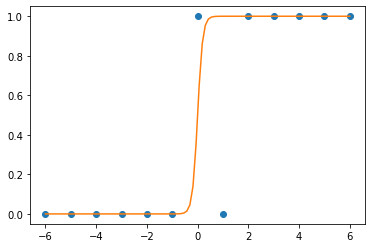

In [98]:
plt.plot(_df.x,_df.y,'o')
plt.plot(xx,f(10*xx))
# 만약 f라는 함수에 xx가 아니라 2,3,4,,,등을 곱하면 xx의 영향력이 커진다..
# 즉, outlier 개수가 줄어든다?,,

# 시그모이드가 좀 더 과적합...???????>......,,,,,,

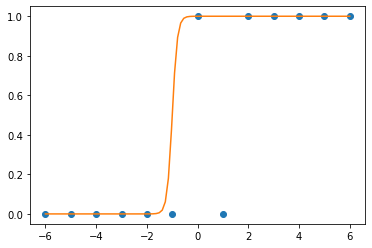

In [121]:
plt.plot(_df.x,_df.y,'o')
plt.plot(xx,f(10*xx+10))
# 만약 f라는 함수에 xx가 아니라 2,3,4,,,등을 곱하면 xx의 영향력이 커진다..
# 즉, outlier 개수가 줄어든다?,,

- 그럴싸하다? 

### model

`-` $x$가 커질수록 $y=1$이 잘나오는 모형은 아래와 같이 설계할 수 있음 <--- 외우세요!!!

- $y_i \sim Ber(\pi_i),\quad $ where $\pi_i = \frac{\exp(w_0+w_1x_i)}{1+\exp(w_0+w_1x_i)}$

- $\hat{y}_i= \frac{\exp(\hat{w}_0+\hat{w}_1x_i)}{1+\exp(\hat{w}_0+\hat{w}_1x_i)}=\frac{1}{1+\exp(-\hat{w}_0-\hat{w}_1x_i)}$ 

- $loss= - \sum_{i=1}^{n} \big(y_i\log(\hat{y}_i)+(1-y_i)\log(1-\hat{y}_i)\big)$ <--- 외우세요!!

### toy example

`-` 예제시작 

In [102]:
x=torch.linspace(-1,1,2000).reshape(2000,1)
w0= - 1 
w1= 5 
u = w0+x*w1 
v = torch.exp(u)/(1+torch.exp(u)) # v=πi, 즉 확률을 의미함
y = torch.bernoulli(v) 

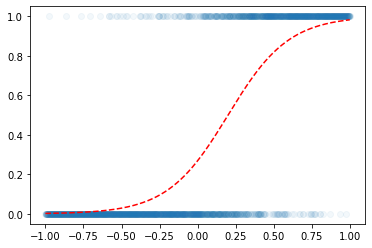

In [123]:
plt.scatter(x,y,alpha=0.05)
plt.plot(x,v,'--r') # true.....

- 우리의 목적: $x$가 들어가면 빨간선 $\hat{y}$의 값을 만들어주는 mapping을 학습해보자. 

### net 설계 

`-` 최초곡선 

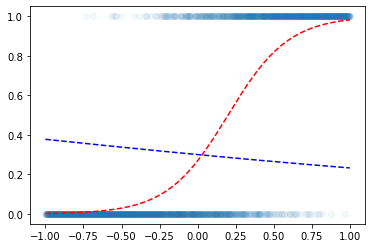

In [105]:
plt.scatter(x,y,alpha=0.05)
plt.plot(x,v,'--r')
w0hat = -0.8470
w1hat = -0.3467 
plt.plot(x,f(x*w1hat+w0hat),'--b')
# 파란선을 학습을 통해 빨간선에 적합시키는 것이 목표?

`-` f 대신에 torch.nn.Sigmoid() 사용해서 함수만들어도 무방 

In [106]:
a1 = torch.nn.Sigmoid()

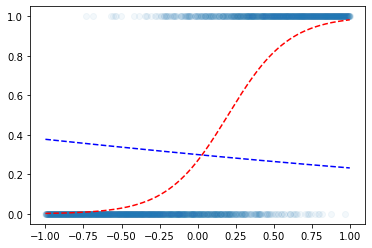

In [107]:
plt.scatter(x,y,alpha=0.05)
plt.plot(x,v,'--r')
w0hat = -0.8470
w1hat = -0.3467 
plt.plot(x,a1(x*w1hat+w0hat),'--b')

`-` x*w1hat + w0hat 대신에 torch.nn.Linear() 로 써도 무방 

In [108]:
torch.manual_seed(43052) 
l1=torch.nn.Linear(in_features=1,out_features=1,bias=True) 

In [109]:
l1.weight

Parameter containing:
tensor([[-0.3467]], requires_grad=True)

In [110]:
l1.bias

Parameter containing:
tensor([-0.8470], requires_grad=True)

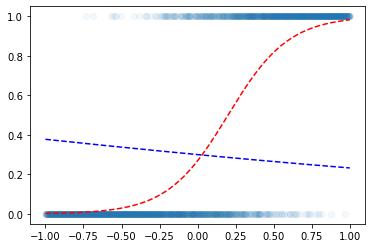

In [111]:
plt.scatter(x,y,alpha=0.05)
plt.plot(x,v,'--r')
plt.plot(x,a1(l1(x)).data,'--b')

`-` 지금 $x \overset{l1}{\to} u \overset{a1}{\to} v = \hat{y}$ 구조임 

`-` l1,a1 을 sequential 하게 (직렬로) 엮어서 $ x \overset{net}{\to} \hat{y}$ 로 만들수 없을까? 

In [112]:
net = torch.nn.Sequential(l1,a1) 

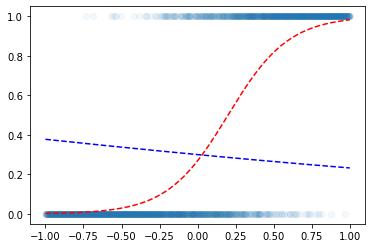

In [113]:
plt.scatter(x,y,alpha=0.05)
plt.plot(x,v,'--r')
plt.plot(x,net(x).data,'--b')

### 학습

`-` 이제 옵티마이저 설계하고 학습하자. 

In [114]:
optimizr = torch.optim.SGD(net.parameters(),lr=0.05) 

`-` step1~4 

(1000번 학습)

In [115]:
for epoc in range(1000): 
    ## 1 
    yhat= net(x) 
    ## 2 
    loss= torch.mean((y-yhat)**2) ## loss가 사실 이러면 안됩니다.. ㅠㅠ 
    ## 3 
    loss.backward() 
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

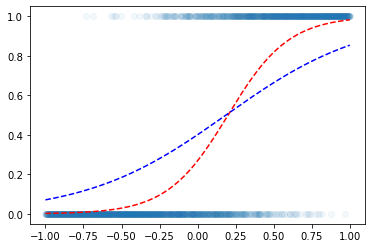

In [116]:
plt.scatter(x,y,alpha=0.05)
plt.plot(x,v,'--r') # 정답값
plt.plot(x,net(x).data,'--b')

(5000번 추가학습)

In [117]:
for epoc in range(5000): 
    ## 1 
    yhat= net(x) 
    ## 2 
    loss= torch.mean((y-yhat)**2) ## 사실 이러면 안됩니다.. ㅠㅠ 
    ## 3 
    loss.backward() 
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

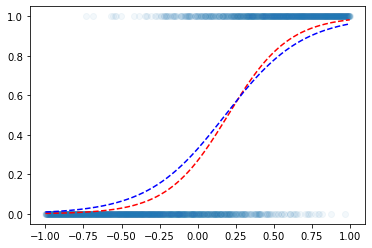

In [118]:
plt.scatter(x,y,alpha=0.05)
plt.plot(x,v,'--r')
plt.plot(x,net(x).data,'--b')